In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
data = pd.read_csv("Obfuscated-MalMem2022.csv")

In [45]:
# Display the first few rows of the dataset
data.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [4]:
data.shape # Print the shape of the dataset

(58596, 57)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [6]:
#Checking null values
data.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [46]:
# Get the count of each category in the 'Category' column
data["Category"].value_counts()

Category
Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d

In [47]:
# Define a function to extract the main category
def find_category(column):
    if "-" in column:
        category = column.split("-")[0]
        return category
    else:
        return column

In [48]:
# Define a function to extract the category name
def find_category_name(column):
    if "-" in column:
        category_name = column.split("-")[1]
        return category_name
    else:
        return column

In [49]:
# Apply the find_category function to the 'Category' column
data["category"] = data["Category"].apply(find_category)

In [50]:
# Get the count of each main category
data["category"].value_counts()

category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

EDA

<Axes: xlabel='category', ylabel='count'>

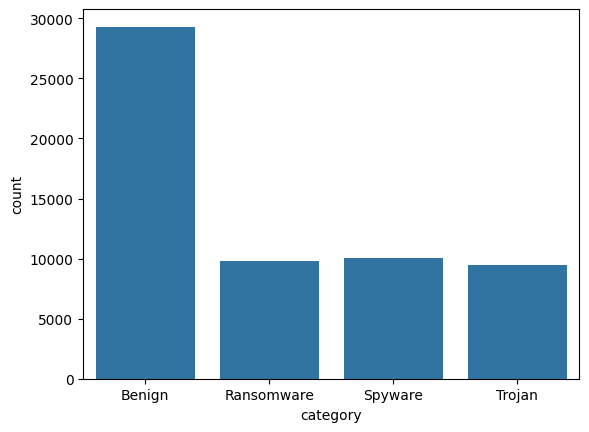

In [51]:
# Plot the count of each main category
sns.countplot(x=data["category"])

<Axes: ylabel='count'>

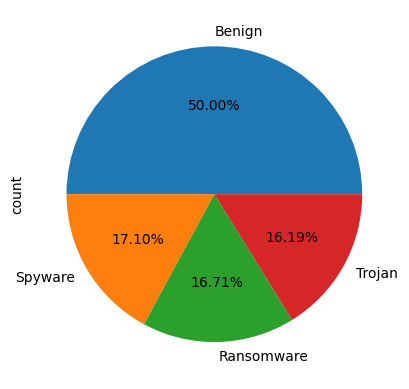

In [52]:
# Plot the distribution of main categories as a pie chart
data["category"].value_counts().plot(kind="pie", autopct="%.2f%%")


In [54]:
data["category_name"] = data["Category"].apply(find_category_name)

In [55]:
# Get the count of each category name
data["category_name"].value_counts()

category_name
Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

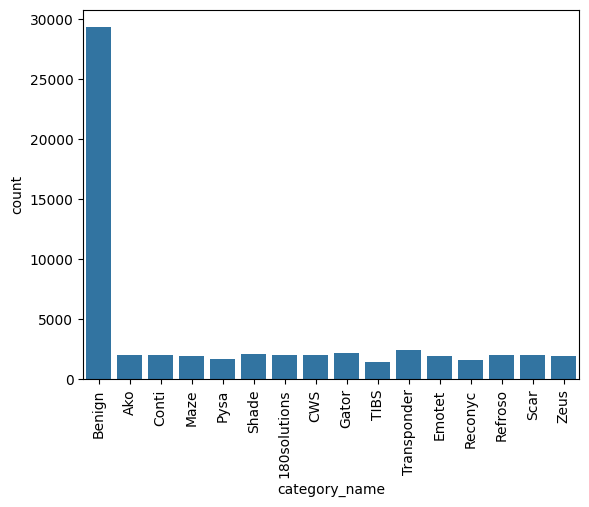

In [56]:
# Plot the count of each category name
plt.figure()
sns.countplot(x=data["category_name"])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

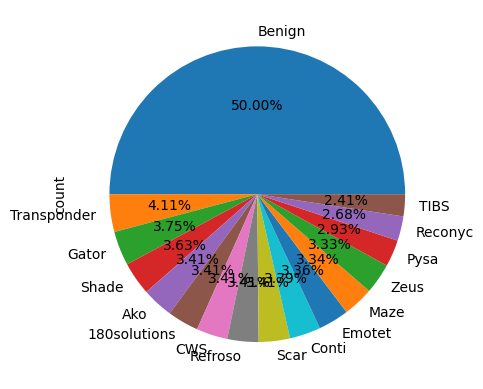

In [19]:
data["category_name"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [57]:
# Define a function to encode categorical columns
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [58]:
# Encode the 'category' column
data["category"] = label_encoder(data["category"])
data["category_name"] = label_encoder(data["category_name"]) # Encode the 'category_name' column
data["class"] = label_encoder(data["Class"]) # Encode the 'Class' column

category ['Benign' 'Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Benign' 'Malware']


In [59]:
data.drop(["Category", "Class"], axis=1, inplace=True) # Drop the original 'Category' and 'Class' columns

In [23]:
data.head(10)

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0
5,40,12,13.800000,0,306.950000,2082,52.050000,12278,306.950000,0,...,27,118,0,123,88,0,8,0,2,0
6,43,13,13.813953,0,305.023256,2169,50.441860,13116,305.023256,0,...,27,118,0,123,88,0,8,0,2,0
7,42,16,11.452381,0,281.404762,2067,49.214286,11819,281.404762,0,...,24,118,0,124,87,0,8,0,2,0
8,42,16,11.452381,0,281.261905,2067,49.214286,11813,281.261905,0,...,24,118,0,124,87,0,8,0,2,0
9,40,12,13.875000,0,308.000000,2082,52.050000,12320,308.000000,0,...,27,118,0,123,88,0,8,0,2,0


In [61]:
# Split the data into features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

In [60]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

Initialize classifiers


In [29]:
logreg = LogisticRegression()

In [30]:
dt = DecisionTreeClassifier()

In [31]:
xgb = XGBClassifier()

In [64]:
clfs = [
    ("Logistic Regression", logreg),
    ("Decision Tree", dt),
    ("Extreme Gradient Boosting", xgb)
]

In [63]:
scores_data_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
scores_data = pd.DataFrame(columns=scores_data_cols)

In [65]:
# Train each classifier and calculate the evaluation metrics
for clf_name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    new_row = pd.DataFrame([{
        "Model Name": clf_name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision Score": precision_score(y_test, y_pred),
        "Recall Score": recall_score(y_test, y_pred)
    }])
    scores_data = pd.concat([scores_data, new_row], ignore_index=True)

print(scores_data)

                  Model Name  Accuracy Score  F1 Score  Precision Score  \
0        Logistic Regression        0.999886  0.999887              1.0   
1              Decision Tree        1.000000  1.000000              1.0   
2  Extreme Gradient Boosting        1.000000  1.000000              1.0   

   Recall Score  
0      0.999773  
1      1.000000  
2      1.000000  


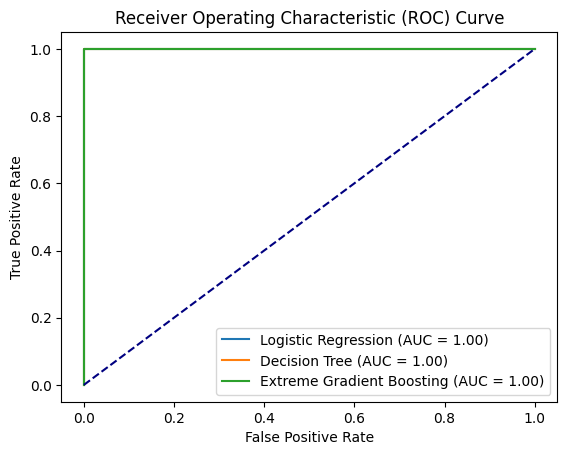

In [43]:
# Train classifiers and record scores
for clf_name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    new_row = pd.DataFrame([{
        "Model Name": clf_name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision Score": precision_score(y_test, y_pred),
        "Recall Score": recall_score(y_test, y_pred),
        "AUC-ROC": auc
    }])
    scores_data = pd.concat([scores_data, new_row], ignore_index=True)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{clf_name} (AUC = {auc:.2f})")

# Plot ROC curve details
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [66]:
# Extract the scores for plotting
model_names = scores_data["Model Name"].values
accuracy_scores = scores_data["Accuracy Score"].values
f1_scores = scores_data["F1 Score"].values
precision_scores = scores_data["Precision Score"].values
recall_scores = scores_data["Recall Score"].values

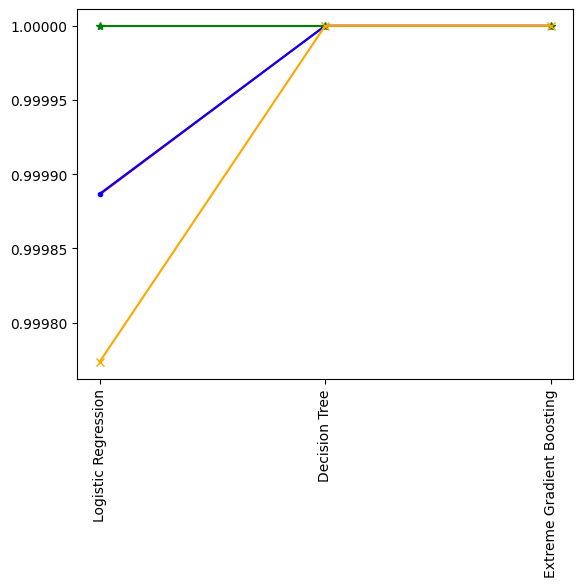

In [67]:
# Plot the evaluation metrics for each model
plt.figure()
plt.plot(model_names, accuracy_scores, color="red", marker=",")
plt.plot(model_names, f1_scores, color="blue", marker=".")
plt.plot(model_names, precision_scores, color="green", marker="*")
plt.plot(model_names, recall_scores, color="orange", marker="x")
plt.xticks(rotation=90)
plt.show()